In [17]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statistics import median, mode, variance
from pprint import pprint

In [18]:
df = pd.read_csv("../../../../DataSets/DelayedFlights.csv")
df_clear = df.dropna(how='any',axis=0)
df_clear.isna().sum()

Unnamed: 0           0
Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [19]:
columns_to_drop = ["Unnamed: 0","Cancelled","CancellationCode","Diverted","UniqueCarrier","TailNum"]
for value in columns_to_drop:
    if value in  df_clear.columns:
        df_clear.drop(columns_to_drop, axis=1, inplace= True);


df_clear= df_clear[df_clear['Origin']=='SEA']
df_clear.head()


C:\Users\sunil\AppData\Local\Temp/ipykernel_5560/2790678760.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear.drop(columns_to_drop, axis=1, inplace= True);


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1324,2008,1,3,4,1457.0,1405,1849.0,1750,972,172.0,...,SEA,ABQ,1180,6.0,15.0,24.0,0.0,7.0,0.0,28.0
1326,2008,1,3,4,1325.0,1255,1553.0,1510,318,88.0,...,SEA,BOI,399,2.0,25.0,11.0,0.0,13.0,0.0,19.0
1329,2008,1,3,4,2022.0,1925,2355.0,2300,1158,153.0,...,SEA,DEN,1024,7.0,18.0,0.0,0.0,0.0,0.0,55.0
1332,2008,1,3,4,2045.0,2010,2140.0,2105,775,55.0,...,SEA,GEG,224,5.0,15.0,0.0,0.0,4.0,0.0,31.0
1333,2008,1,3,4,1753.0,1640,1844.0,1735,1682,51.0,...,SEA,GEG,224,3.0,12.0,0.0,0.0,0.0,0.0,69.0


In [20]:
df_clear = pd.get_dummies(df_clear, columns=["Origin", "Dest"], drop_first=True)
df_clear.head()
df_clear.to_csv("../../../../DataSets/flightDelayAzure.csv")

In [30]:
# Using 2 Sigma interval estimation to find the range of workable dataset.
y = df_clear['ArrDelay']

xbar = np.mean(y) 

print("Mean is :", xbar)

s = np.std(y)

# Lowest Cutoff
L=xbar-2*s

# Highest Cutoff
U=xbar+2*s

print('Highest Cutoff is {} \nLowest Cutoff is {}'.format(U, L))

# Outlier Ditection
outliers = []

for i in y: 
    if i > U or i<L: 
        outliers.append(i) 
print('outliers in dataset is', outliers) 
print('Number of Outlier {} vs Number of Total Entries {} percentage {:.2f}%'.format(len(outliers),len(y), (len(outliers)/len(y))*100))

Mean is : 55.58006301919221
Highest Cutoff is 174.00483713298348 
Lowest Cutoff is -62.84471109459905
outliers in dataset is [208.0, 193.0, 201.0, 232.0, 357.0, 189.0, 202.0, 256.0, 289.0, 329.0, 311.0, 245.0, 221.0, 206.0, 299.0, 176.0, 188.0, 235.0, 250.0, 251.0, 284.0, 235.0, 216.0, 200.0, 364.0, 215.0, 193.0, 243.0, 360.0, 181.0, 195.0, 187.0, 186.0, 191.0, 188.0, 257.0, 186.0, 232.0, 180.0, 189.0, 287.0, 180.0, 223.0, 175.0, 192.0, 194.0, 176.0, 238.0, 208.0, 202.0, 201.0, 206.0, 177.0, 256.0, 203.0, 184.0, 224.0, 197.0, 221.0, 248.0, 236.0, 301.0, 250.0, 231.0, 248.0, 188.0, 182.0, 202.0, 285.0, 192.0, 218.0, 180.0, 212.0, 187.0, 197.0, 192.0, 224.0, 184.0, 228.0, 282.0, 227.0, 228.0, 226.0, 206.0, 177.0, 195.0, 197.0, 339.0, 211.0, 326.0, 183.0, 279.0, 899.0, 411.0, 334.0, 380.0, 183.0, 194.0, 307.0, 302.0, 281.0, 189.0, 229.0, 244.0, 240.0, 186.0, 182.0, 184.0, 242.0, 408.0, 258.0, 235.0, 220.0, 204.0, 217.0, 445.0, 176.0, 186.0, 1267.0, 254.0, 292.0, 204.0, 274.0, 486.0, 1189.

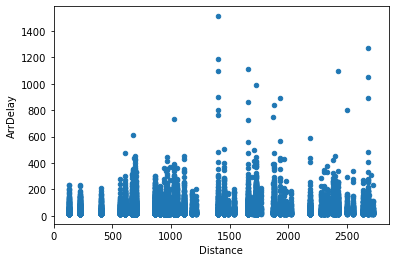

In [31]:
df_clear.plot(x= 'Distance', y='ArrDelay', kind = 'scatter');

In [32]:
X = df_clear.drop("ArrDelay", axis=1)
y = df_clear["ArrDelay"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [33]:
df_clear.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Dest_RNO,Dest_SAN,Dest_SFO,Dest_SIT,Dest_SJC,Dest_SLC,Dest_SMF,Dest_SNA,Dest_STL,Dest_TUS
1324,2008,1,3,4,1457.0,1405,1849.0,1750,972,172.0,...,0,0,0,0,0,0,0,0,0,0
1326,2008,1,3,4,1325.0,1255,1553.0,1510,318,88.0,...,0,0,0,0,0,0,0,0,0,0
1329,2008,1,3,4,2022.0,1925,2355.0,2300,1158,153.0,...,0,0,0,0,0,0,0,0,0,0
1332,2008,1,3,4,2045.0,2010,2140.0,2105,775,55.0,...,0,0,0,0,0,0,0,0,0,0
1333,2008,1,3,4,1753.0,1640,1844.0,1735,1682,51.0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
models = {}
models["DTR"] = DecisionTreeRegressor()
models["RR"] = RandomForestRegressor()
models["LR"] = LinearRegression()
models["RFR"] = RandomForestRegressor()
models["GBR"] = GradientBoostingRegressor()

In [35]:
model_acc = {}
for key in models:
        for i in range(1):
                model_r = models[key]
                dt = model_r.fit(X_train,y_train) # fit the model
                a = model_r.score(X_test,y_test) # compute accuracy
        model_acc[key] = a

In [36]:
pd.DataFrame([model_acc])


,DTR,RR,LR,RFR,GBR
0,0.944322,0.955184,1.0,0.954866,0.955592
